First we have to install the requirements

In [1]:
pip install -r "requirements.txt"

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import IPython.display as display
import random

In this project we shall consider N particles interacting with each other. The interaction energy between any two particles $i$ and $j$ is given by the Lennard-Jones potential:

\begin{equation}
V(r_{ij})=4\epsilon\left[\left(\frac{b}{r_{ij}}\right)^{12}-\left(\frac{b}{r_{ij}}\right)^{6}\right]
\end{equation}

where $r_{ij}$ is given as the carthesian distance $|\vec{r_i}-\vec{r_j}|$ between the particles $i$ and $j$,
$b$ is some constant determining the range of the interaction and
$\epsilon$ is some constant determining the strength of the interaction

Newtons equations of motion for particle $i$ then becomes:

\begin{equation}
m\frac{d^2\vec{r_{i}}}{dt^2} = \vec{f_i} = -\sum_{j\neq i}\frac{\partial V(r_{r_{ij}})}{\partial \vec{r_{i}}} = -\sum_{j\neq i}\frac{\partial V(r_{r_{ij}})}{\partial r_{ij}}\hat{r}_{ij}
\end{equation}

where $m$ is the mass of the particle,
$\vec{r_{i}}$ is the position of the particle,
$\hat{r}_{ij}$ is the unit vector with direction from particle $j$ to particle $i$, namely $\frac{\vec{r_{i} }-\vec{r_j}}{r_{ij}}$, since going in this direction for $r_i$ would increase the distance between the particles, so if the potential gets bigger by increasing the distance between the particles, we want to decrease the distance between the particles, namely go in the direction of $r_j$

### Task 0. Dimensionaless Equations

In this task we wish to clean up the Leonnard Jones potential by turning it dimensionless. We can do so by inserting the new $\tilde{r_{i}}$ such that $\vec{r_i} = b \tilde{r_i}$. This turns equation the previous equation into:

\begin{equation}

V(\tilde{r}_{ij})=4\epsilon\left[\left(\frac{1}{\tilde{r}_{ij}}\right)^{12}-\left(\frac{1}{\tilde{r}_{ij}}\right)^{6}\right]
\end{equation}

where $r_{ij}$ is now the distance between the two particles in the $\tilde{r}$ system, not in the $\vec{r}$ system

We know want to make newtons equations dimensionless!
Defining $\tilde{t}$ such that t = $\tilde{t} \tau$ where $\tau = \sqrt{\frac{mb^2}{\epsilon}}$, let's see what happens to Newtons Equations:
\begin{align*}
m\frac{d^2\vec{r_{i}}}{dt^2} &= -\sum_{j\neq i}\frac{\partial V(r_{ij})}{\partial r_{ij}}\hat{r}_{ij}\\
mb \frac{d^2\tilde{r}_{i}}{\tau ^2 d\tilde{t}^2} &= -\sum_{j\neq i} \frac{\partial V(\tilde{r}_{ij})}{b\:\partial \tilde{r}_{ij}}\hat{r}_{ij}\\
\frac{mb^2}{\epsilon \tau^2} \frac{d^2\tilde{r}_{i}}{d\tilde{t}^2} &= 4\sum_{j\neq i}\left[12\tilde{r}_{ij}^{-13} - 6 \tilde{r}_{ij}^{-7}\right]\hat{r}_{ij}\\
\frac{d^2\tilde{r}_{i}}{d\tilde{t}^2} &= 4\sum_{j\neq i}\left[12\tilde{r}_{ij}^{-13} - 6 \tilde{r}_{ij}^{-7}\right]\hat{r}_{ij}\\
\end{align*}
Here we see that we have a dimensionless form of Newtons equations! From now on, unless other is specified, $\tilde{r}$ will be denoted $r$ and $\tilde{t}$ will be denoted $t$ for simplicity, so that we have Newtons Equations like this

\begin{equation}
\frac{d^2\vec{r}_{i}}{dt^2} = 4\sum_{j\neq i}\left[12r_{ij}^{-13} - 6r_{ij}^{-7}\right]\hat{r}_{ij}
\end{equation}

### Task 1. Two Particles
#### 1a)

In this task we are to look at how two particles behave when they are experiencing the lennard-jones potential between them

Since we in task 2 are creating a general algorithm for $N$ particles, I will here just basically consider linear motion in 1 direction, meaning the start velocities will be in the direction/antidirection of the other particle, and if we want to see how 2 particles behave in this force-field, we can check it out in task 2

In [6]:
def double_derivative(r):
    return 4*(12*r**(-13)-6*r**(-7))

def two_particles(dt, T, v_1_0, v_2_0, d_0):
    n = int(T/dt)

    r_1_array = np.zeros(n)
    r_2_array = np.zeros(n)
    v_1_array = np.zeros(n)
    v_2_array = np.zeros(n)

    r_2_array[0] = d_0
    v_1_array[0] = v_1_0
    v_2_array[0] = v_2_0

    t_array = np.arange(0,T,dt)

    for i in range(n-1):
        r = np.linalg.norm(r_1_array[i]-r_2_array[i])

        r12_hat = -1 if r_2_array[i] > r_1_array[i] else 1

        r_1_array[i+1] = r_1_array[i] + v_1_array[i]*dt + 1/2*double_derivative(r)*r12_hat*dt**2
        r_2_array[i+1] = r_2_array[i] + v_2_array[i]*dt + 1/2*double_derivative(r)*(-r12_hat)*dt**2

        r_next = np.linalg.norm(r_1_array[i+1]-r_2_array[i+1])
        r_12_hat_next = -1 if r_2_array[i+1] > r_1_array[i+1] else 1

        v_1_array[i+1] = v_1_array[i] + dt/(2)*(double_derivative(r)*r12_hat+double_derivative(r_next)*r_12_hat_next)
        v_2_array[i+1] = v_2_array[i] + dt/(2)*(double_derivative(r)*(-r12_hat)+double_derivative(r_next)*(-r_12_hat_next))
    
    return t_array, r_1_array, r_2_array, v_1_array, v_2_array

#### 1b)

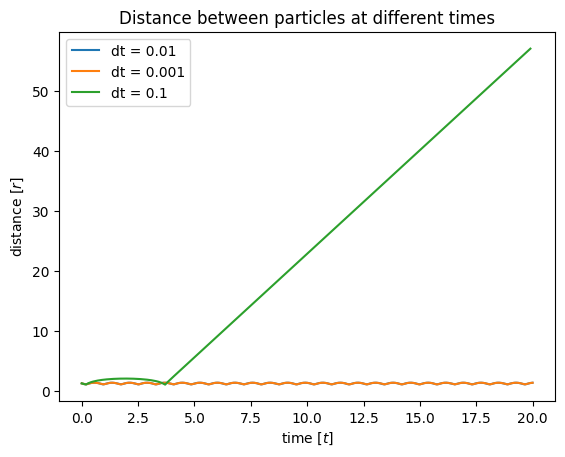

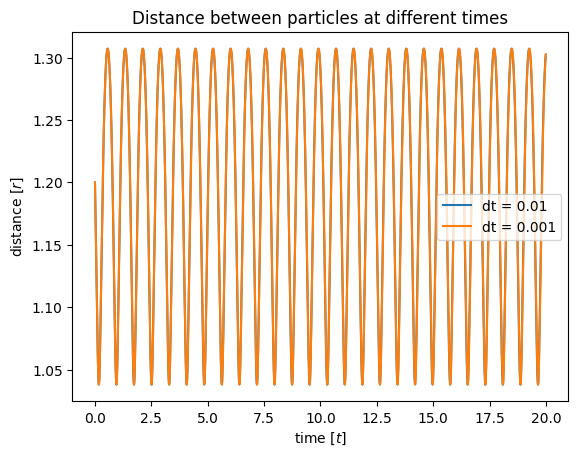

In [4]:
T = 20
v_1_0 = 0.3
v_2_0 = -0.7
d_0 = 1.2

t, r1, r2, v1, v2 = two_particles(0.01, T, v_1_0, v_2_0, d_0)
plt.plot(t, r2-r1, label = "dt = 0.01")
t, r1, r2, v1, v2 = two_particles(0.001, T, v_1_0, v_2_0, d_0)
plt.plot(t, r2-r1, label = "dt = 0.001")
t, r1, r2, v1, v2 = two_particles(0.1, T, v_1_0, v_2_0, d_0)
plt.plot(t, r2-r1, label = "dt = 0.1")

plt.title(r'Distance between particles at different times')
plt.xlabel(r'time [$t$]')
plt.ylabel(r'distance [$r$]')
plt.legend()
plt.show()

t, r1, r2, v1, v2 = two_particles(0.01, T, v_1_0, v_2_0, d_0)
plt.plot(t, r2-r1, label = "dt = 0.01")
t, r1, r2, v1, v2 = two_particles(0.001, T, v_1_0, v_2_0, d_0)
plt.plot(t, r2-r1, label = "dt = 0.001")

plt.title(r'Distance between particles at different times')
plt.xlabel(r'time [$t$]')
plt.ylabel(r'distance [$r$]')
plt.legend()
plt.show()

As we can see from the graphs, dt = 0.1 clearly goes out of oscillations, and there has been some big numerical error when implementing a timestep that big

#### 1c)

When we are going to look at the mechanical energy of the system we need to transfer our new coordinates to the system where energy has a meaning, so in the equation below we denote our new coordinates with $\tilde{t}$ and $\tilde{r}$

\begin{align*}
\frac{m}{2}\dot{r}^2 = \frac{mb^2}{2}\dot{\tilde{r}}^2 = \frac{mb^2}{2\tau^2}\tilde{r}'^2 = \frac{\epsilon}{2}\tilde{r}'^2
\end{align*}

So we get dimension $\epsilon$. We can therefore look at the mechanical energy divided by $\epsilon$, so that:
\begin{align*}
\frac{E}{\epsilon} = \frac{1}{2}\dot{r_1}^2+\frac{1}{2}\dot{r_2}^2+4(r_{ij}^{-12}-r_{ij}^{-6})
\end{align*}

In [5]:
def mechanical_energy_1D(r_1, r_2, v_1, v_2):
    return 1/2*(v_1**2+v_2**2) + 4*((r_2-r_1)**(-12)-(r_2-r_1)**(-6))

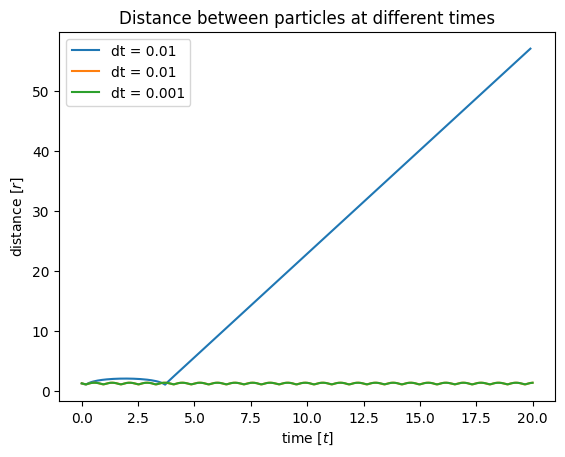

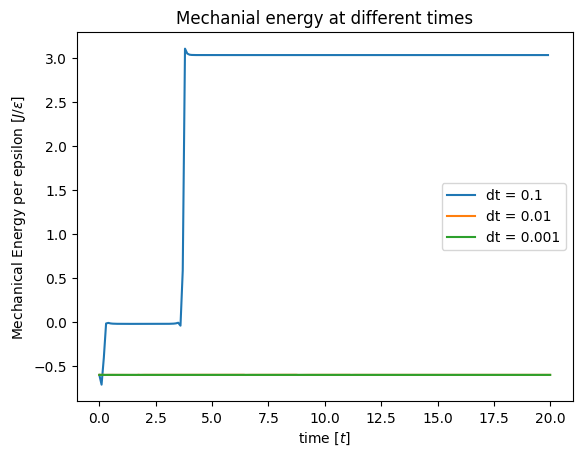

In [6]:
fig_distance, ax_distance = plt.subplots()
fig_energy, ax_energy = plt.subplots()

t, r1, r2, v1, v2 = two_particles(0.1, T, v_1_0, v_2_0, d_0)
ax_distance.plot(t, r2-r1, label = "dt = 0.01")
ax_energy.plot(t, mechanical_energy_1D(r1,r2,v1,v2), label = "dt = 0.1")

t, r1, r2, v1, v2 = two_particles(0.01, T, v_1_0, v_2_0, d_0)
ax_distance.plot(t, r2-r1, label = "dt = 0.01")
ax_energy.plot(t, mechanical_energy_1D(r1,r2,v1,v2), label = "dt = 0.01")

t, r1, r2, v1, v2 = two_particles(0.001, T, v_1_0, v_2_0, d_0)
ax_distance.plot(t, r2-r1, label = "dt = 0.001")
ax_energy.plot(t, mechanical_energy_1D(r1,r2,v1,v2), label = "dt = 0.001")

ax_distance.set_title(r'Distance between particles at different times')
ax_distance.set_xlabel(r'time [$t$]')
ax_distance.set_ylabel(r'distance [$r$]')


ax_energy.set_title(r'Mechanial energy at different times')
ax_energy.set_xlabel(r'time [$t$]')
ax_energy.set_ylabel(r'Mechanical Energy per epsilon [$J/\epsilon$]')

ax_distance.legend()
ax_energy.legend()
plt.show()

We can see that the mechanical energy is not at all conserved for $dt$ = 0.1, so let's disgard that timestep, and check out the energy conservation for the two other

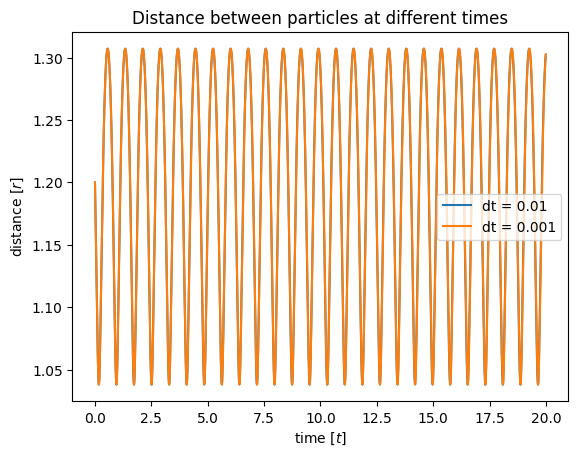

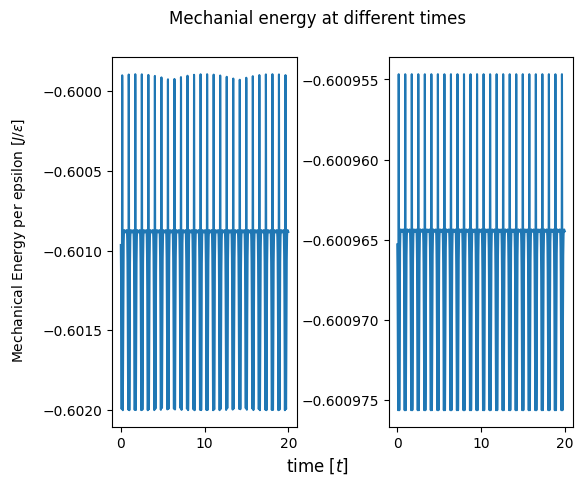

In [7]:
fig_distance, ax_distance = plt.subplots()
fig_energy, (ax_energy_1, ax_energy_2) = plt.subplots(1,2)

t, r1, r2, v1, v2 = two_particles(0.01, T, v_1_0, v_2_0, d_0)
ax_distance.plot(t, r2-r1, label = "dt = 0.01")
ax_energy_1.plot(t, mechanical_energy_1D(r1,r2,v1,v2), label = "dt = 0.01")

t, r1, r2, v1, v2 = two_particles(0.001, T, v_1_0, v_2_0, d_0)
ax_distance.plot(t, r2-r1, label = "dt = 0.001")
ax_energy_2.plot(t, mechanical_energy_1D(r1,r2,v1,v2), label = "dt = 0.001")
ax_energy_2.ticklabel_format(style = 'plain', useOffset=False)

ax_distance.set_title(r'Distance between particles at different times')
ax_distance.set_xlabel(r'time [$t$]')
ax_distance.set_ylabel(r'distance [$r$]')

fig_energy.suptitle(r'Mechanial energy at different times')
fig_energy.subplots_adjust(left = 0.18, wspace = 0.5)
fig_energy.supxlabel(r'time [$t$]')
fig_energy.supylabel(r'Mechanical Energy per epsilon [$J/\epsilon$]', fontsize = 10)

ax_distance.legend()

plt.show()

We can see that the one with the smallest $dt$ has a much smaller deviation from constant energy, but both have small enough deviation, so both can be used, one could classify it as a bit overkill to use $dt = 0.001$ based on this, especially for longer times and many particles

In [8]:
def index(array, item):
    for idx, val in np.ndenumerate(array):
        if val == item:
            return idx

### Task 2: Mini-gas

In [5]:
class Simulation:

    """
    2a)
    """

    ###########################################################################

    def __init__(self, N, K, A_factor, V_0 = 10, comments = False):

        self.R = self._R(A_factor, N)
        self.K = K
        self.N = N
        self.V_0 = V_0
        self.v = np.sqrt(2*V_0)
        self.A_factor = A_factor
        self.comments = comments

    def _R(self, A_factor, N):
        return np.sqrt(N/A_factor)

    def spring(self, r_array):
        return np.array([-self.K*(r-self.R) if r > self.R else 0 for r in r_array])

    def _f_wall(self, r_array):
        return np.repeat(np.reshape(self.spring(np.linalg.norm(r_array, axis = -1)), (self.N, 1)), 2, axis = -1)*r_array/np.repeat(np.reshape(np.linalg.norm(r_array, axis = -1), (self.N, 1)), 2, axis = -1)
    
    def _create_initial_conditions(self):

        self.r_0 = np.zeros((self.N,2), dtype=float)
        self.v_0 = np.zeros((self.N,2), dtype=float)    

        for i in range(self.N):

            possible = False

            while not possible:

                possible = True

                r = self.R*np.sqrt(random.uniform(0,1))
                theta_r = random.uniform(0,2*np.pi)
                theta_v = random.uniform(0,2*np.pi)

                self.r_0[i,0] = r*np.cos(theta_r)
                self.r_0[i,1] = r*np.sin(theta_r)

                self.v_0[i,0] = self.v*np.cos(theta_v)
                self.v_0[i,1] = self.v*np.sin(theta_v)

                for j in range(self.N):

                    if i!=j:

                        if np.linalg.norm(self.r_0[i]-self.r_0[j]) < 1:
                            possible = False
                            break

    def _setup_initial_conditions(self, dt, T):

        self.T = T
        self.n = int(T/dt)
        self.dt = dt

        self.t_array = np.arange(0,T,dt)
        self.r_array = np.zeros((self.n,) + np.shape(self.r_0))
        self.v_array = np.zeros((self.n,) + np.shape(self.r_0))

        self.r_array[0] = self.r_0
        self.v_array[0] = self.v_0
        
    def simulate(self, dt, T):

        """
        The r (position) anv v (velocity) arrays will have the folloing shape (n, N, 2)
        where an index in position n determines the time,
        an index in position N determines what particle we are looking at,
        and an index in position 2 determines if it's x or y, x being 0 and y being 1
        """

        self._create_initial_conditions()

        self._setup_initial_conditions(dt, T)

        directions = np.repeat([self.r_array[0]], self.N, axis = 0) - np.array([self.r_array[0]]).transpose((1,0,2))
        distances = np.linalg.norm(directions, axis = 2)
        distances += np.eye(self.N, self.N)
        directions/=(np.repeat(np.reshape(distances, (self.N, self.N, 1)), 2, axis = -1))

        comment_t = self.t_array[::int(self.n//10)][1:]

        for t_i in range(self.n-1):

            if self.comments:
                if self.t_array[t_i] in comment_t:
                    print(int(t_i*100/self.n)," percent done calculating!")

            self.r_array[t_i+1] += self.r_array[t_i] + self.v_array[t_i]*dt

            self.r_array[t_i+1] += 0.5*np.sum(directions * np.repeat(np.reshape(double_derivative(distances), (self.N, self.N, 1)), 2, axis = -1), axis = 0)*dt**2
            self.r_array[t_i+1] += 0.5*(self._f_wall(self.r_array[t_i]))*dt**2

            new_directions = np.repeat([self.r_array[t_i+1]], self.N, axis = 0) - np.array([self.r_array[t_i+1]]).transpose((1,0,2))
            new_distances = np.linalg.norm(new_directions, axis = 2)
            new_distances += np.eye(self.N, self.N)
            new_directions/=(np.repeat(np.reshape(new_distances, (self.N, self.N, 1)), 2, axis = -1))

            self.v_array[t_i+1] += self.v_array[t_i]
            self.v_array[t_i+1] += 0.5*np.sum(directions * np.repeat(np.reshape(double_derivative(distances), (self.N, self.N, 1)), 2, axis = -1), axis = 0)*dt
            self.v_array[t_i+1] += 0.5*(self._f_wall(self.r_array[t_i]))*dt
            self.v_array[t_i+1] += 0.5*np.sum(new_directions * np.repeat(np.reshape(double_derivative(new_distances), (self.N, self.N, 1)), 2, axis = -1), axis = 0)*dt
            self.v_array[t_i+1] += 0.5*(self._f_wall(self.r_array[t_i+1]))*dt

            distances = new_distances
            directions = new_directions
        
        if self.comments:
            print("100 percent done calculating")

    def video(self, T = 0, start_T = 0):

        if (T == 0 or T > self.T):
            T = self.T

        if (T+start_T) > self.T:
            start_T = self.T-T

        fig, ax = plt.subplots(figsize=(10,10))

        theta = np.linspace(0,2*np.pi,50)
        circle_x = self.R * np.cos(theta)
        circle_y = self.R * np.sin(theta)

        ax.set_xlim(-1.1 * self.R, 1.1 * self.R)
        ax.set_ylim(-1.1 * self.R, 1.1 * self.R)

        circle_line = ax.plot(circle_x, circle_y, color='blue')
        points = ax.scatter([],[], color='red', s = int(1000/self.R))

        def _drawframe(x):

            points.set_offsets(self.r_array[int(start_T/self.dt) + x*int(0.01/self.dt)])

            return [points]

        anim = animation.FuncAnimation(fig, _drawframe, frames=int(100*T), interval=10, blit=True)
        video = HTML(anim.to_html5_video())
        display.display(video)
        plt.close()

    def _lennard_jones(self, d):
        return 4/d**(12)-4/d**(6)
    
    def _spring_potential(self, d):
        return 1/2*self.K*(d-self.R)**2 if d>self.R else 0

    def energy(self):

        self.energy_array = np.zeros_like(self.t_array)
        self.kinetic_energy_array = np.zeros_like(self.t_array)

        print_t_array = self.t_array[::int(self.n/10)]

        for t_i in range(self.n):

            if self.comments:
                if self.t_array[t_i] in print_t_array:
                    print(10*int(10*t_i/self.n), " prosent ferdig kalkulert" )

            self.kinetic_energy_array[t_i] = 0.5*np.sum(np.linalg.norm(self.v_array[t_i], axis = -1)**2)
            self.energy_array[t_i] += np.sum(np.array([self._spring_potential(np.linalg.norm(self.r_array[t_i, i])) for i in range (self.N)]))
            self.energy_array[t_i] += np.sum(np.tril(self._lennard_jones(np.linalg.norm(np.repeat([self.r_array[t_i]], self.N, axis = 0) - np.array([self.r_array[t_i]]).transpose((1,0,2)), axis = -1) + np.eye(self.N, self.N)), k = -1))
            self.energy_array[t_i] += self.kinetic_energy_array[t_i]

    def plot_energy(self):

        self.energy()
        plt.figure(figsize=(15,10))
        plt.plot(self.t_array, self.energy_array)
        plt.title("Mechanical Energy")
        plt.xlabel("time")
        plt.ylabel("energy")
        plt.show()

    def plot_kinetic_energy(self):
        plt.figure(figsize=(15,10))
        plt.plot(self.t_array, self.kinetic_energy_array)
        plt.title("Mechanical Energy")
        plt.xlabel("time")
        plt.ylabel("energy")
        plt.show()


###########################################################################

    """
    2b)
    """

###########################################################################

    def velocities_hist(self):

        fig, axes = plt.subplots(1,2, sharey = True)

        v = np.arange(-10,10,0.1)

        v_x = np.reshape(self.v_array[1000:,:,0], (np.size(self.v_array[1000:,:,0]),))
        v_y = np.reshape(self.v_array[1000:,:,1], (np.size(self.v_array[1000:,:,1]),))

        def p(v):
            return 0.14*np.e**(-(0.14)**2*np.pi*v**2)

        axes[0].hist(v_x, 100, density = True)
        axes[1].hist(v_y, 100, density = True)
        axes[0].plot(v, p(v))
        axes[1].plot(v, p(v))

        axes[0].set_xlabel(r'$v_x$')
        axes[1].set_xlabel(r'$v_y$')

        fig.suptitle(r'Probability density of velocities $v_x$ and $v_y$')
        fig.subplots_adjust(left = 0.15, wspace = 0.15)
        fig.supxlabel(r'velocity', fontsize = 10)
        fig.supylabel(r'probability density', fontsize = 10)

        plt.show()

    def velocities_hist_2(self):

        fig, axes = plt.subplots(1,2, sharey = True)

        v = np.arange(-10,10,0.1)

        def p(v):
            return 0.14*np.e**(-(0.14)**2*np.pi*v**2)

        axes[0].hist(self.v_array[:,:,0], 100, density = True)
        axes[1].hist(self.v_array[:,:,1], 100, density = True)
        axes[0].plot(v, p(v))
        axes[1].plot(v, p(v))

        axes[0].set_xlabel(r'$v_x$')
        axes[1].set_xlabel(r'$v_y$')

        fig.suptitle(r'Probability density of velocities $v_x$ and $v_y$')
        fig.subplots_adjust(left = 0.15, wspace = 0.15)
        fig.supxlabel(r'velocity', fontsize = 10)
        fig.supylabel(r'probability density', fontsize = 10)

        plt.show()

###########################################################################

    """
    2c)
    """

###########################################################################

    def pressure(self):
        
        pressure_array = np.zeros_like(self.t_array)

        for t_i in range(self.n):

            pressure_array[t_i] += np.sum(np.linalg.norm(self._f_wall(self.r_array[t_i]), axis = -1))
            pressure_array[t_i] /= 2*np.pi*self.R
        
        self.pressure = np.mean(pressure_array[int(self.n/2):])
        return self.pressure
    
    def T_0(self):
        """
        calculates kBT, since the kinetic energy changes over time
        """
        return np.mean(self.kinetic_energy_array[int(self.n/2):])/self.N
    
    def theoretical_pressure(self):

        return self.T_0() * self.A_factor/(np.pi)
    
    

In [10]:
simulation = Simulation(N = 100, K = 50, A_factor = 0.04, V_0=8, comments = True)
simulation.simulate(0.005, 10)

10  percent done calculating!
20  percent done calculating!
30  percent done calculating!
40  percent done calculating!
50  percent done calculating!
60  percent done calculating!
70  percent done calculating!
80  percent done calculating!
90  percent done calculating!
100 percent done calculating


0  prosent ferdig kalkulert
10  prosent ferdig kalkulert
20  prosent ferdig kalkulert
30  prosent ferdig kalkulert
40  prosent ferdig kalkulert
50  prosent ferdig kalkulert
60  prosent ferdig kalkulert
70  prosent ferdig kalkulert
80  prosent ferdig kalkulert
90  prosent ferdig kalkulert


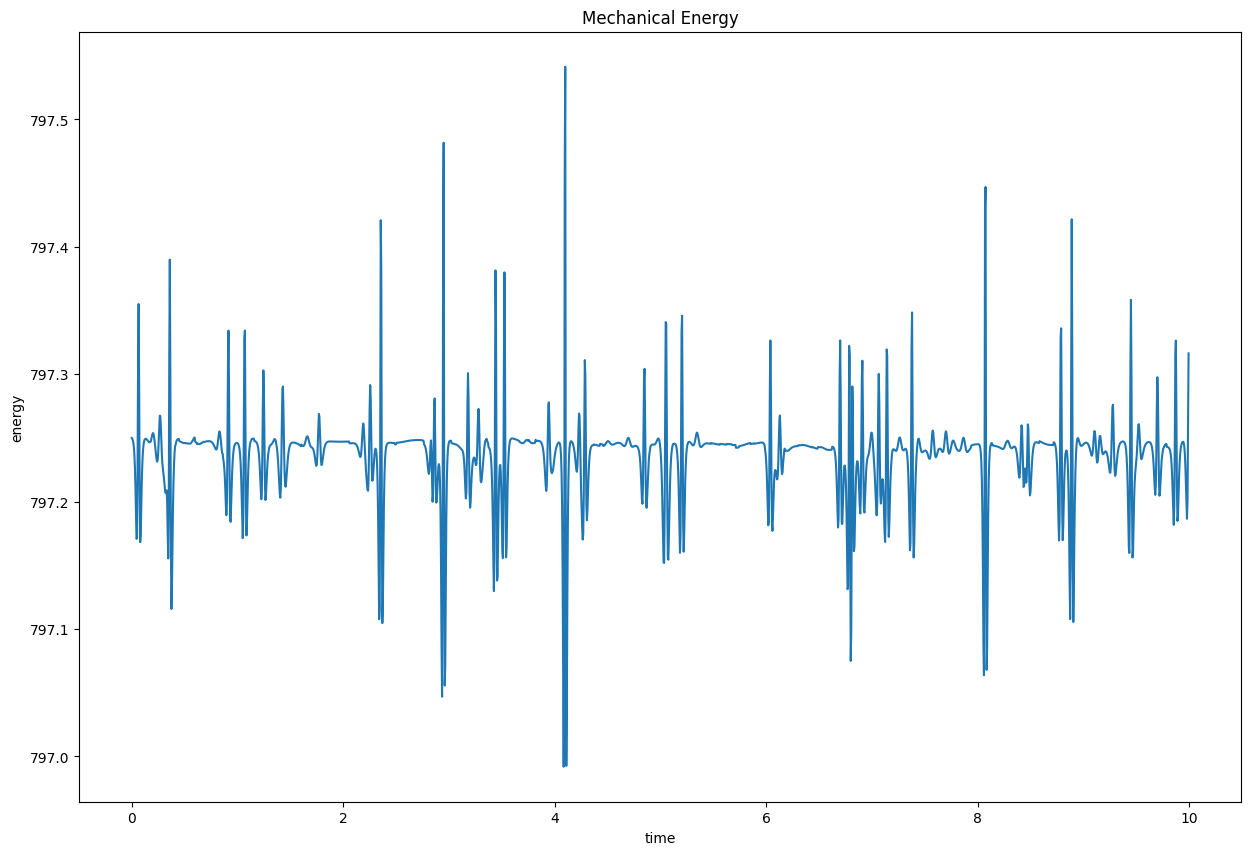

In [11]:
simulation.plot_energy()

Som vi kan se er det lite variasjon i den totale energien, så det er rimelig å anta at modellen vår funker bra!

In [12]:
simulation.video(T = 1)

Let's take a small break from the tasks, and check if we have uniformely distributed particles, so let's run a test with 1000 particles, which should be enough to clearly see uniformely distributed particles around the space, over a small time, so the run time isn't too big

In [13]:
sim = Simulation(N = 1000, K = 100, A_factor = 0.05, V_0 = 30, comments=True)

sim.simulate(dt = 0.005, T = 2)
sim.video(T=2)

10  percent done calculating!
20  percent done calculating!
30  percent done calculating!
40  percent done calculating!
50  percent done calculating!
60  percent done calculating!
70  percent done calculating!
80  percent done calculating!
90  percent done calculating!
100 percent done calculating


As we can see, it seems plausible that we are properly distributing the particles uniformely around the space, something that is important, so that the system doesn't take too much time to prepare the state of equilibrium in gas phase

b)

Let's check if our system is ergodic by plotting the probability distribution of the velocities in $x$ and $y$ direction. If the system is properly ergodic, it should obey the Maxwell-Boltzmann probability distribution

10  percent done calculating!
20  percent done calculating!
30  percent done calculating!
40  percent done calculating!
50  percent done calculating!
60  percent done calculating!
70  percent done calculating!
80  percent done calculating!
90  percent done calculating!
100 percent done calculating


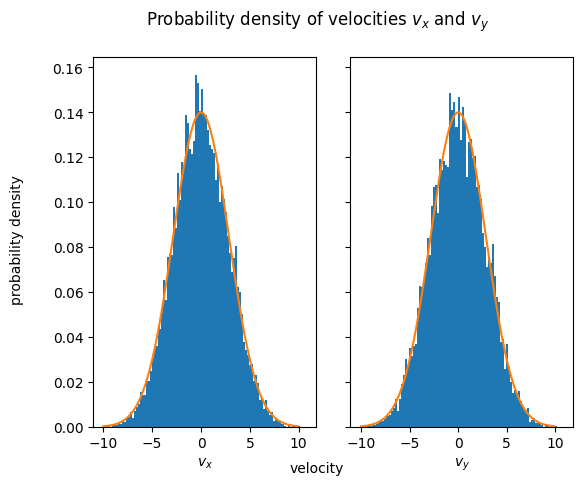

In [14]:
simulation = Simulation(N = 100, K = 100, A_factor = 0.01, V_0=8, comments=True)
simulation.simulate(dt=0.005, T = 2000)
simulation.velocities_hist()

Here I have also plotted the theoretical gaussian probability distribution, and as we can see, the actual probability distribution is roughly equal to the theoretical, meaning if we account for numerical errors and the fact that 100 isn't nearly the same as infinite or for example avogrados number $N_a$ which is roughly $10^{24}$

0  prosent ferdig kalkulert
10  prosent ferdig kalkulert
20  prosent ferdig kalkulert
30  prosent ferdig kalkulert
40  prosent ferdig kalkulert
50  prosent ferdig kalkulert
60  prosent ferdig kalkulert
70  prosent ferdig kalkulert
80  prosent ferdig kalkulert
90  prosent ferdig kalkulert


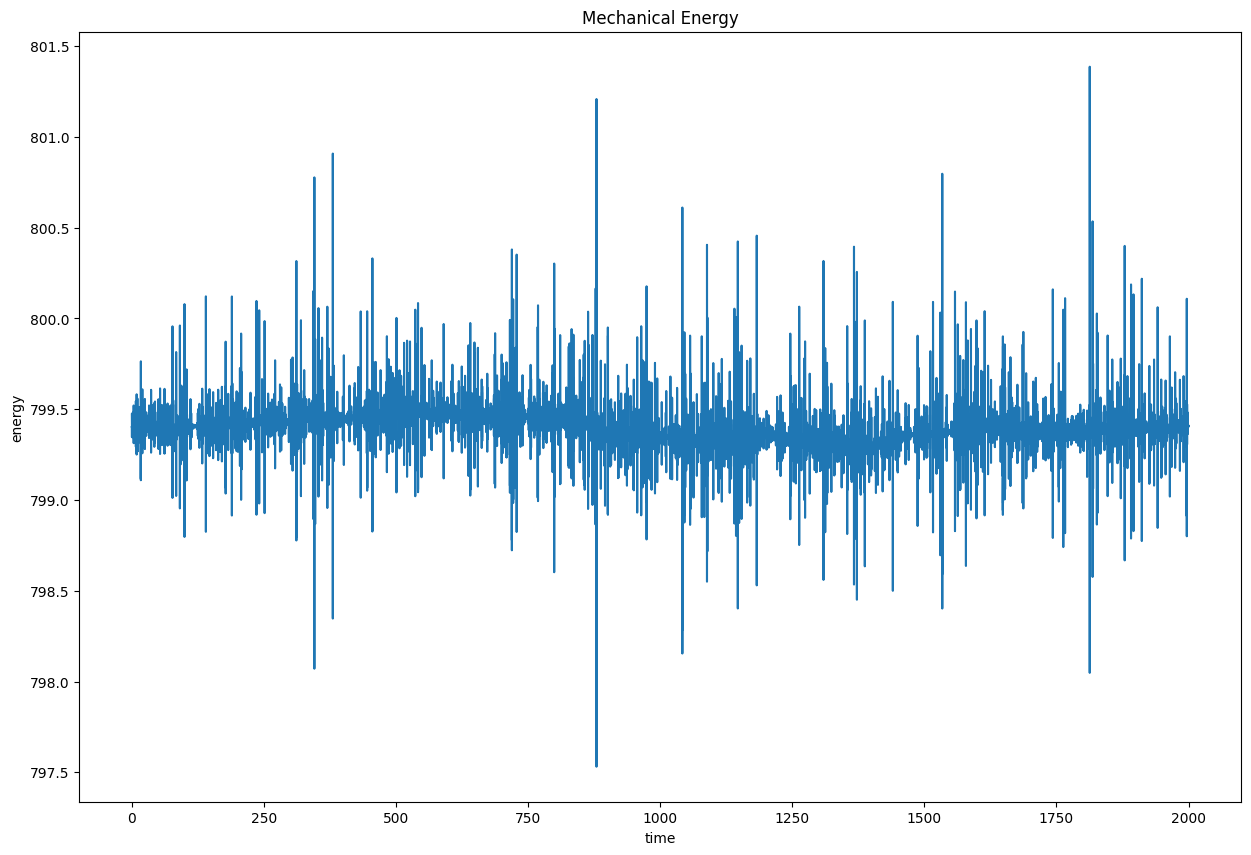

In [15]:
simulation.plot_energy()

Since we are searching over such a big time, to get millions of datapoints, let's see if the energy is somewhat conserved, so that our model still works over the timespan of 2000. And we can see that the energy is gradually declining, but there is very little difference, so our model should still work very well

c)

We are now going to look at the pressure of the system

In the following A' is equal to my definition of A_factor, the quantity I use to determine my radius, based on A_factor and N, such that for constant A_factor, the area spanned by the particles divided by the area spanned by the circle is constant, namely equal to A_factor.

For example, this is how it would be defined:
$\frac{N\pi}{\pi R^2}$ equal A' equal $\frac{N}{R^2}$

\begin{align*}
pV &= Nk_BT\\
pV &= N\overline{T}\\
p &= \frac{N\overline{T}}{V}\\
p &= \frac{N\overline{T}}{\pi R^2}\\
p &= \frac{N\overline{T}A'}{\pi N}\\
p &= \frac{\overline{T}A'}{\pi}
\end{align*}

where $\overline{T}$ is the average kinetic energy in 2D
This is the formula I used to plot the ideal gas law for my system

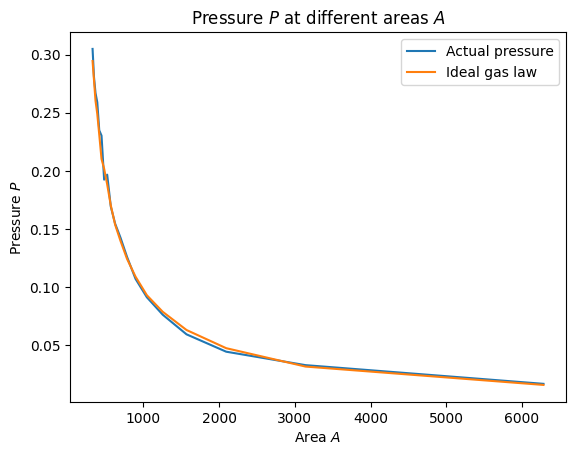

4  av 20 kalkulasjoner ferdig
8  av 20 kalkulasjoner ferdig
12  av 20 kalkulasjoner ferdig
16  av 20 kalkulasjoner ferdig
20  av 20 kalkulasjoner ferdig
mean-abs-relative-error for approx 2 kbT:	 0.0628610786319302
mean-abs-relative-error for approx 4 kbT:	 0.03586505063039362
mean-abs-relative-error for approx 6 kbT:	 0.026827157796415393
mean-abs-relative-error for approx 8 kbT:	 0.01852950194211052
mean-abs-relative-error for approx 10 kbT:	 0.015620589901341166


In [29]:
V_0_array=[2,4,6,8,10]

i = 0

A_factor_array = np.arange(0.01,0.2,0.01)
p_real = []
p_teo = []
a = []

for A_factor in A_factor_array:
    simulation = Simulation(N = 20, K = 100, A_factor=A_factor, V_0=5)
    simulation.simulate(dt = 0.005, T = 40)
    simulation.energy()
    p_real.append(simulation.pressure())
    p_teo.append(simulation.theoretical_pressure())
    a.append(np.pi*simulation.R**2)

plt.plot(a, p_real, label = "Actual pressure")
plt.plot(a, p_teo, label = "Ideal gas law")
plt.title(r'Pressure $P$ at different areas $A$')
plt.xlabel(r'Area $A$')
plt.ylabel(r'Pressure $P$')
plt.legend()
plt.show()

pressures = np.zeros((len(V_0_array),)+(4,))
theoretical_pressures = np.zeros((len(V_0_array),)+(4,))

for V_0 in V_0_array:
    for A_factor in [0.005, 0.01, 0.02, 0.05]:
        simulation = Simulation(N = 20, K = 100, A_factor=A_factor, V_0=V_0)
        simulation.simulate(dt = 0.005, T = 100)
        simulation.energy()
        pressures[i//4, i%4] = simulation.pressure()
        theoretical_pressures[i//4, i%4] = simulation.theoretical_pressure()
        i+=1
    print(i, f" av {np.size(pressures)} kalkulasjoner ferdig")

for i in range(np.shape(pressures)[0]):

    print(f"mean-abs-relative-error for approx {V_0_array[i]} kbT:\t", np.mean(np.array([ abs(e) for e in np.divide(pressures[i]-theoretical_pressures[i], theoretical_pressures[i])])))

Here I have plotted the actual pressure of the system for a given inital velocity, and the ideal gas law, based on the temperature of that system for many different areas, so note that the temperature is not constant in this plot, only almost constant, because the average kinetic energy at equilibrium is somewhat different from the intial kinetic energy

I have also measured the mean-abs-relative error based on the ideal gas law for different initial kinetic energies, and as we can see, the ideal gas law seems to be better for higher temperatures

#### D)

Let's try and run our system at different temperatures, and see where the system behaves like a liquid

In [28]:
for V_0 in [2, 1, 0.7, 0.5, 0.3, 0.2, 0.1, 0.05]:
    simulation = Simulation(N = 20, K = 100, A_factor=0.1, V_0=V_0)
    simulation.simulate(dt = 0.01, T = 300)
    simulation.energy()
    print(f"k_BT = {simulation.T_0()} epsilon")
    print(f"V_0 = {V_0} epsilon")
    simulation.video(T = 10, start_T=250)

k_BT = 2.019535079603995 epsilon
V_0 = 2 epsilon


k_BT = 1.0271797442785189 epsilon
V_0 = 1 epsilon


k_BT = 0.7165077325877622 epsilon
V_0 = 0.7 epsilon


k_BT = 0.6078370057623478 epsilon
V_0 = 0.5 epsilon


k_BT = 0.4420373978618091 epsilon
V_0 = 0.3 epsilon


k_BT = 0.4200916159336171 epsilon
V_0 = 0.2 epsilon


k_BT = 0.4616547886432617 epsilon
V_0 = 0.1 epsilon


k_BT = 0.3936012532499585 epsilon
V_0 = 0.05 epsilon


As we can see the system starts behaving a little bit like a liquid first at around initial velocites equal to $0.5/0.7\epsilon$, but is properly equal to a liquid, somewhere around $0.1$ to $0.2$ $\epsilon$

#### e)

We are now going to try and find the coexistence pressure between gas and liguid! Based on the task above, since we see the first signs of liquid-tendencies around $k_B T$ equal to $0.5$ to $0.7\:\epsilon$, we try $k_B T = 0.5 \epsilon$ in hope of being in the coexistence area below the critical temperature. We're also doing multiple runs at each area, and are instead taking the average pressure for each area to try and compensate for numerical errors, so that we don't get false tops and bottoms. Since we are calculating pressure, I remove the first half of the measurements, since the particles haven't gotten to their "normal" state yet, and the temperature hasn't become stable yet. So I need a way to figure out what start kinetic velocities result in what kinetic energy. The start kinetic is a great guess, but the actual temperature would probably be higher than the one calculated from the initial velocites. So I try to find the right V_0 to get the correct temperature T. I also try and use 100 particles, so the run time is going to be quite big, combined with a period of 200, and many many runs

In [10]:
def find_V_0(N, K, A_factor, T_optimal, tol = 0.05):

    times = 2
    
    V_0_array = np.zeros(times)

    for j in range(times):

        T = T_optimal
        V_0 = T_optimal

        i = 0

        while ((abs(T-T_optimal)/T_optimal) > tol or i==0) and i<10:
            V_0 += (T_optimal-T)*4/5
            V_0 = 0 if V_0<0 else V_0       # ensure not negative
            simulation = Simulation(N = N, K = K, A_factor = A_factor, V_0 = V_0)
            simulation.simulate(dt = 0.01, T = 150)
            simulation.energy()
            T = simulation.T_0()
            i += 1

        V_0_array[j] = V_0

    return np.mean(V_0_array)



1  av  24  simuleringer gjennomført!
2  av  24  simuleringer gjennomført!
3  av  24  simuleringer gjennomført!
4  av  24  simuleringer gjennomført!
5  av  24  simuleringer gjennomført!
6  av  24  simuleringer gjennomført!
7  av  24  simuleringer gjennomført!
8  av  24  simuleringer gjennomført!
9  av  24  simuleringer gjennomført!
10  av  24  simuleringer gjennomført!
11  av  24  simuleringer gjennomført!
12  av  24  simuleringer gjennomført!
13  av  24  simuleringer gjennomført!
14  av  24  simuleringer gjennomført!
15  av  24  simuleringer gjennomført!
16  av  24  simuleringer gjennomført!
17  av  24  simuleringer gjennomført!
18  av  24  simuleringer gjennomført!
19  av  24  simuleringer gjennomført!
20  av  24  simuleringer gjennomført!
21  av  24  simuleringer gjennomført!
22  av  24  simuleringer gjennomført!
23  av  24  simuleringer gjennomført!
24  av  24  simuleringer gjennomført!


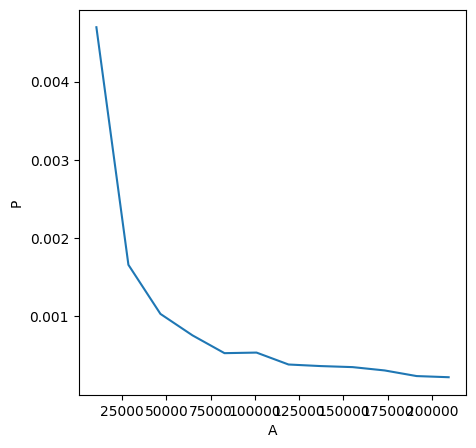

In [11]:
points = 12
T_optimal = 0.5
K = 50
N = 100
times = 2

A = np.linspace(N*np.pi/0.03, N*np.pi/0.0015, points)

new_A_factor = np.zeros_like(A)
new_A_factor += np.pi*N
new_A_factor /= A

pressures = np.zeros_like(A)
volumes = []

V_0s = []
for i in range(points):

    V_0 = find_V_0(N=N, K=K, A_factor=new_A_factor[i], T_optimal = T_optimal)

    for j in range(times):

        simulation = Simulation(N = N, K = 40, A_factor=new_A_factor[i], V_0 = V_0)
        simulation.simulate(dt = 0.01, T=300)
        pressures[i] += simulation.pressure()
        print(times*i+j+1, " av ", points*times, " simuleringer gjennomført!")

    volumes.append(np.pi*N/new_A_factor[i])

pressures/=times

plt.figure(figsize=(5,5))
plt.plot(volumes, pressures)
plt.xlabel("A")
plt.ylabel("P")
plt.show()

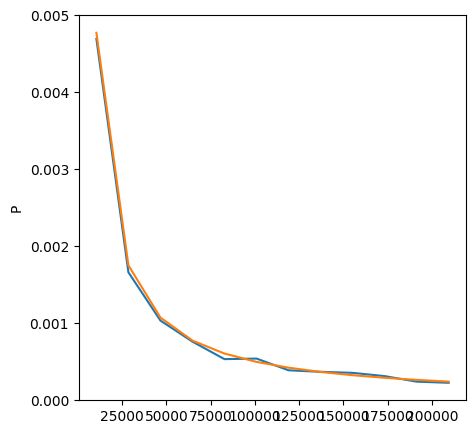

In [14]:
def ideal_gas(A):
    return N*T_optimal/A

plt.figure(figsize=(5,5))
plt.plot(volumes, pressures)
plt.plot(volumes, ideal_gas(np.array(volumes)))
plt.ylabel("P")
plt.show()

Som vi kan se er det en topp, men det er nok ikke nok til å si at vi har et likevektstrykk. Det er nok mest sannsynlig numerisk feil